1.07 Activity 1
Refer to the files_for_activities/regression_data.csv file. (The same file used in the class example.)

Draw a box plot for the IC2.
Print the descriptive statistics for IC2.
Remove the outliers from the column IC2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data file
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


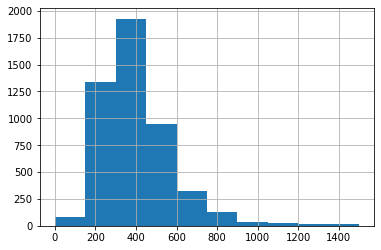

In [3]:
data['IC2'].hist()
plt.show()

In [4]:
data['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

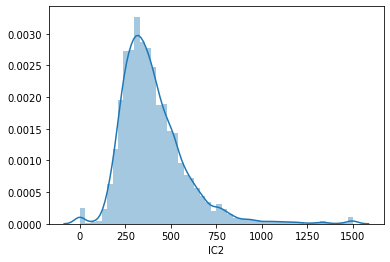

In [5]:
sns.distplot(data['IC2'])
plt.show()

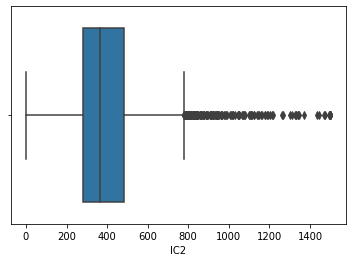

In [6]:
sns.boxplot(x=data['IC2'])
plt.show()

In [7]:
# removing outliers
iqr = np.percentile(data['IC2'],75) - np.percentile(data['IC2'],25)
upper_limit = np.percentile(data['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC2'],25) - 1.5*iqr

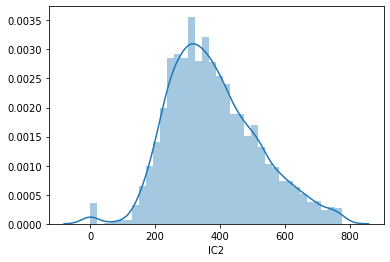

In [8]:
data2 = data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)]
sns.distplot(data2['IC2'])
plt.show()

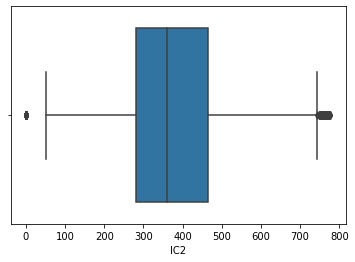

In [9]:
sns.boxplot(x=data2['IC2'])
plt.show()

1.07 Activity 2
Keep using the same file.

Repeat the process(log transformation) for the column IC3. Define the function again yourself.

Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. 

Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#import data file
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [60]:
# removing outliers
iqr = np.percentile(data['IC3'],75) - np.percentile(data['IC3'],25)
upper_limit = np.percentile(data['IC3'],75) + 3*iqr
lower_limit = np.percentile(data['IC3'],25) - 3*iqr

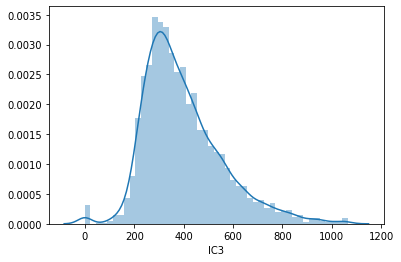

In [61]:
data2 = data[(data['IC3']>lower_limit) & (data['IC3']<upper_limit)]
sns.distplot(data2['IC3'])
plt.show()

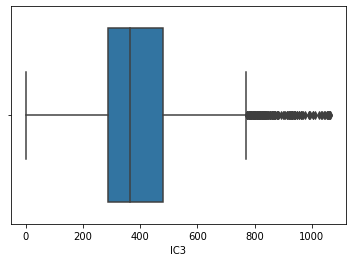

In [62]:
sns.boxplot(x=data2['IC3'])
plt.show()

In [63]:
def log_transfom_clean1(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

IC3_log = list(map(log_transfom_clean1, data2['IC3']))

C:\Users\ClaMa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


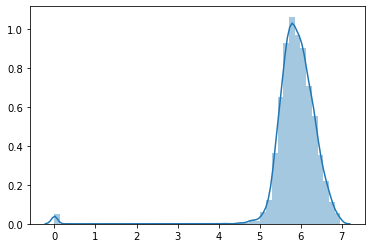

In [64]:
sns.distplot(IC3_log)
plt.show()

In [65]:
def log_transfom_clean2(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data2['IC3_log'] = list(map(log_transfom_clean2, data2['IC3']))
# Now we replace the NA by the mean
data2['IC3_log'] = data2['IC3_log'].fillna(np.mean(data2['IC3_log']))

C:\Users\ClaMa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\ClaMa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ClaMa\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [68]:
#data.shape

(4843, 8)

In [69]:
#data2.shape

(4824, 8)

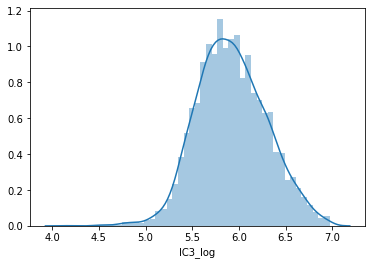

In [66]:
sns.distplot(data2['IC3_log'])
plt.show()

In [67]:
data2 = data2.drop(['IC3'], axis=1)
data2.head()

,HV1,IC1,IC2,IC4,IC5,AVGGIFT,TARGET_D,IC3_log
0,2346,420,446,503,14552,15.500000,21.0,6.148468
1,497,350,364,384,11696,3.080000,3.0,5.877736
2,1229,469,502,544,17313,7.500000,20.0,6.228511
3,325,148,181,209,6334,6.700000,5.0,5.141664
4,768,174,201,249,7802,8.785714,10.0,5.393628


# 1.07 Activity 3

Repeat the same steps for column `IC5` for box-cox transformation.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
#import data file
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [77]:
data['IC5_'] = np.where(data['IC5']<=0,0,data['IC5'])

In [78]:
mean = np.sum(data['IC5_'])/len(data[data['IC5_']>0])
data['IC5_'] = data['IC5_'].replace(0,mean)
data = data.drop(['IC5'], axis=1)

In [79]:
from scipy import stats

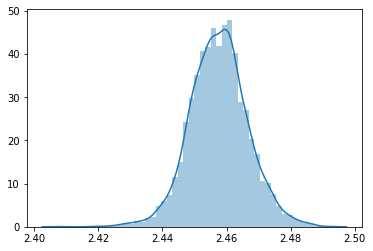

In [81]:
xt, lmbda = stats.boxcox(data['IC5_'])
sns.distplot(xt)
plt.show()